<a href="https://colab.research.google.com/github/Pameta1/Telecom_X/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import pandas as pd

In [2]:
datos = pd.read_json('/content/TelecomX_Data.json')

In [3]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [6]:
# se Normaliza las columnas anidadas

customer_datos = pd.json_normalize(datos['customer'])
customer_datos.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [7]:
phone_datos = pd.json_normalize(datos['phone'])

In [8]:
internet_datos = pd.json_normalize(datos['internet'])

In [9]:
account_datos = pd.json_normalize(datos['account'])

In [23]:
# Normalizamos las columnas anidadas

datos_cliente  = pd.concat(
    [datos[['customerID','Churn']], customer_datos, phone_datos, internet_datos, account_datos],
                        axis=1
                      )

In [24]:
datos_cliente.info()
datos_cliente.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [25]:
datos_cliente['Charges.Total'] = pd.to_numeric(datos_cliente['Charges.Total'], errors='coerce')

In [28]:
categoria_cols = [
    'Churn','gender','Partner','Dependents','PhoneService','MultipleLines',
    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies','Contract',
    'PaperlessBilling','PaymentMethod'
]

for col in categoria_cols:
    datos_cliente[col] = datos_cliente[col].astype('category')


In [27]:
(datos_cliente.info())
(datos_cliente[['Charges.Monthly','Charges.Total']].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   object  
 1   Churn             7267 non-null   category
 2   gender            7267 non-null   category
 3   SeniorCitizen     7267 non-null   int64   
 4   Partner           7267 non-null   category
 5   Dependents        7267 non-null   category
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   category
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   category
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          7267 n

,Charges.Monthly,Charges.Total
count,7267.000000,7256.000000
mean,64.720098,2280.634213
std,30.129572,2268.632997
min,18.250000,18.800000
25%,35.425000,400.225000
50%,70.300000,1391.000000
75%,89.875000,3785.300000
max,118.750000,8684.800000


#📊 Carga y análisis

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

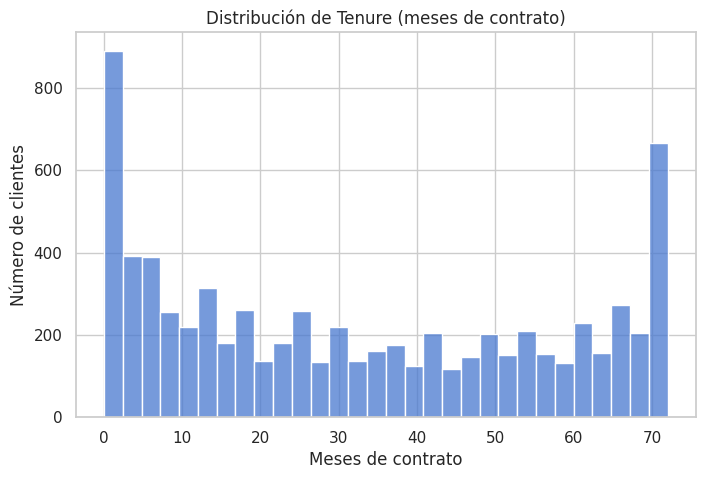

In [30]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(8,5))
sns.histplot(datos_cliente['tenure'], bins=30, kde=False)
plt.title("Distribución de Tenure (meses de contrato)")
plt.xlabel("Meses de contrato")
plt.ylabel("Número de clientes")
plt.show()

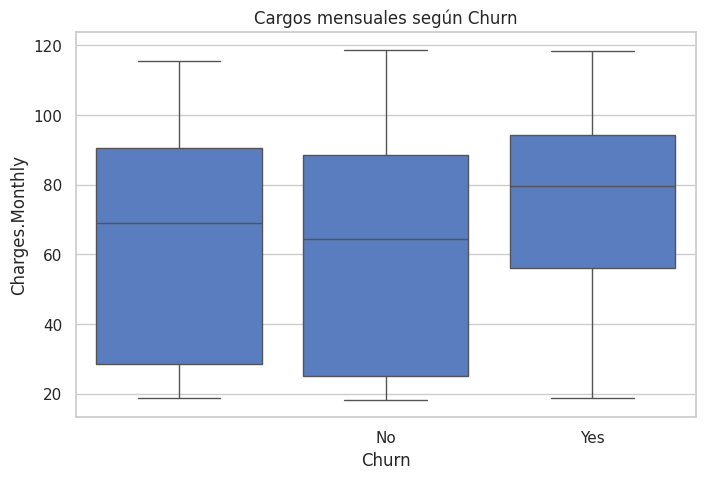

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Charges.Monthly', data=datos_plano)
plt.title("Cargos mensuales según Churn")
plt.show()



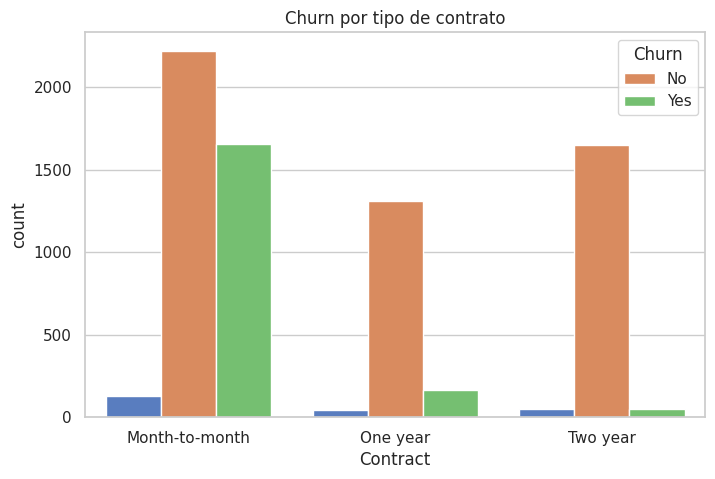

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=datos_plano)
plt.title("Churn por tipo de contrato")
plt.show()


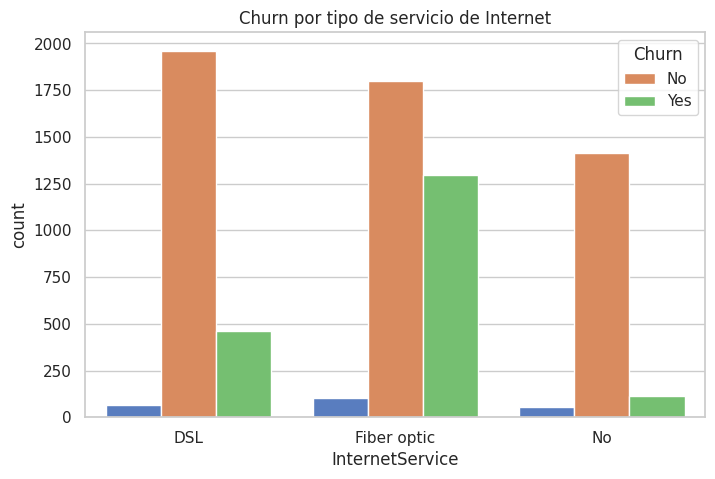

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService', hue='Churn', data=datos_plano)
plt.title("Churn por tipo de servicio de Internet")
plt.show()


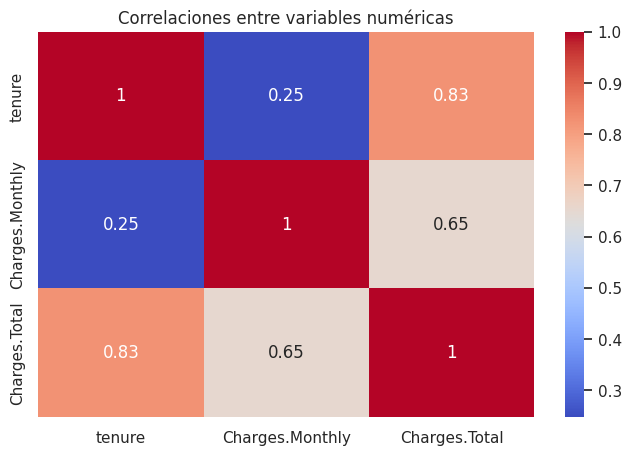

In [21]:
plt.figure(figsize=(8,5))
sns.heatmap(datos_plano[['tenure','Charges.Monthly','Charges.Total']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlaciones entre variables numéricas")
plt.show()


#📄Informe final

#### 1- Distribución de Tenure
- La mayoría de los clientes tiene contratos de corta duración (menos de 12 meses).
- Los clientes con mayor antigüedad muestran una menor tasa de churn, lo que indica que la fidelización aumenta con el tiempo.



####2. Cargos Mensuales vs Churn
- Los clientes que pagan cargos mensuales más altos tienden a cancelar con mayor frecuencia.
- El boxplot muestra que la mediana de MonthlyCharges es significativamente mayor en clientes que se fueron.


####3. Tipo de Contrato
- Los contratos mensuales concentran la mayor tasa de churn.
- Los contratos de largo plazo (anual o bianual) presentan una retención mucho más alta, sugiriendo que la modalidad de contrato es un factor crítico.


####4. Servicio de Internet
- Los clientes con Fibra Óptica muestran una tasa de churn más elevada que los de DSL.
- Los clientes sin servicio de internet tienen una tasa de churn muy baja, probablemente porque su relación con la empresa es limitada (solo telefonía).


#####5. Servicios Adicionales
- La ausencia de servicios como OnlineSecurity, TechSupport y DeviceProtection se asocia con mayor churn.
- Los clientes que contratan estos servicios adicionales muestran mayor permanencia, lo que sugiere que los “bundles” de valor agregado ayudan a retener.


####6. Correlaciones Numéricas
- TotalCharges está fuertemente correlacionado con tenure (clientes antiguos acumulan más gasto).
- MonthlyCharges no se correlaciona directamente con tenure, lo que indica que el monto mensual depende más de los servicios contratados que de la antigüedad.


###Insights Clave
- Contratos mensuales + cargos altos + sin servicios adicionales → perfil de mayor riesgo de churn.
- Clientes con contratos largos y servicios de soporte/seguridad → perfil de mayor fidelización.
- Estrategia sugerida: incentivar migración a contratos anuales y ofrecer paquetes de servicios adicionales como seguridad y soporte técnico.
